# K-Nearest Neighbors (K-NN)

# Importar librerias

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importar el dataset

In [35]:
dataset = pd.read_csv('C:/Users/marti/OneDrive/Escritorio/jupyter/database/Social_Network_Ads.csv')

# Visualizando los datos

In [36]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


- eliminaremos la columna User ID ya que no aporta informacion a los datos al ser una varible de indices

# Eliminando la columna User ID

In [38]:
dataset=dataset.drop(columns=['User ID'])

# Viendo si el conjunto de datos tiene valores nulos

In [39]:
dataset.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Resumen de los datos

In [40]:
dataset.describe(include="all")

,Gender,Age,EstimatedSalary,Purchased
count,400,400.000000,400.000000,400.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,204,NaN,NaN,NaN
mean,NaN,37.655000,69742.500000,0.357500
std,NaN,10.482877,34096.960282,0.479864
min,NaN,18.000000,15000.000000,0.000000
25%,NaN,29.750000,43000.000000,0.000000
50%,NaN,37.000000,70000.000000,0.000000
75%,NaN,46.000000,88000.000000,1.000000


# convirtiendo la varialbe Gender en numerica para calcular la correlacion de nuestro conjunto de datos

In [23]:
dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female': 0})

# Matriz de correlacion

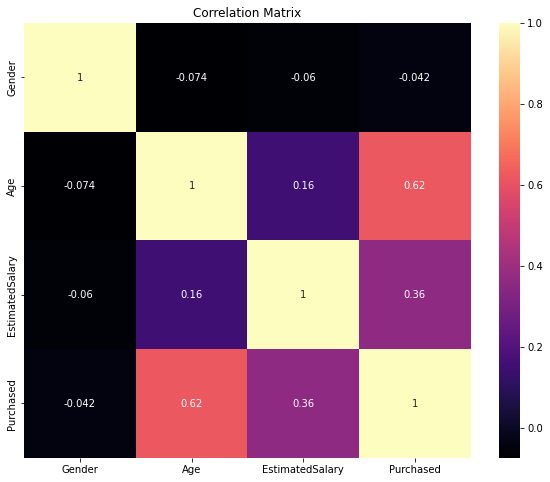

In [24]:
# Crear una figura y ejes con un tamaño personalizado
fig, ax = plt.subplots(figsize=(10, 8))

# Crear la matriz de correlación con seaborn
sns.heatmap(dataset.corr(), annot = True, cmap = 'magma',ax=ax)
plt.title('Correlation Matrix')
plt.show()

- notemos que las variables Gender Age Salary no estan correlacionadas entre si.
- las variables Age y salary estan correlacionadas con purchased

# ajustaremos un modelo donde Age y salary estimaran si Pertencen a Purchased o no

In [41]:
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values

In [42]:
# Creamos el conjunto de entrenamiento y 
# lo separamos del conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Ajuste de escalas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
# Entrenamiento del modelo KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap


classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
    # Predicción del conjunto de prueba
y_pred = classifier.predict(X_test)
    # Matriz de confusion
cm = confusion_matrix(y_test, y_pred)
estimacion=classifier.score(X_test,y_test)
print(f"Efectividad de el modelo es {estimacion}")

Efectividad de el modelo es 0.93


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


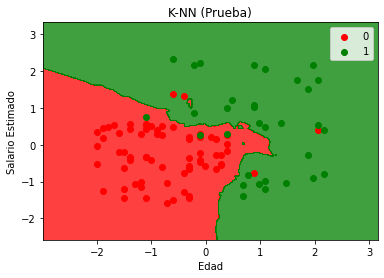

In [32]:
# Visualizacion de los datos de prueba
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()